# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 3
# Multiple Linear Regression, Subset Selection, Cross Validation

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
%matplotlib inline

# Forecasting Bike Sharing Usage

In this homework, we will focus on multiple linear regression and will explore techniques for subset selection. The specific task is to build a regression model for a bike share system that can predict the total number of bike rentals in a given day, based on attributes about the day. Such a demand forecasting model would be useful in planning the number of bikes that need to be available in the system on any given day, and also in monitoring traffic in the city. The data for this problem was collected from the Capital Bikeshare program in Washington D.C. over two years.   

The data set is provided in the files `Bikeshare_train.csv` and `Bikeshare_test.csv`, as separate training and test sets. Each row in these files contains 10 attributes describing a day and its weather:
- season (1 = spring, 2 = summer, 3 = fall, 4 = winter)
- month (1 through 12, with 1 denoting Jan)
- holiday (1 = the day is a holiday, 0 = otherwise)
- day_of_week (0 through 6, with 0 denoting Sunday)
- workingday (1 = the day is neither a holiday or weekend, 0 = otherwise)
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp (temperature in Celsius)
- atemp (apparent temperature, or relative outdoor temperature, in Celsius)
- humidity (relative humidity)
- windspeed (wind speed)

and the last column 'count' contains the response variable, i.e. total number of bike rentals on the day.


## Part (a): Data Exploration & Preprocessing

As a first step, identify important characteristics of the data using suitable visualizations when necessary. Some of the questions you may ask include (but are not limited to):

- How does the number of bike rentals vary between weekdays and weekends? 
- How about bike rentals on holidays?
- What effect does the season have on the bike rentals on a given day?
- Is the number of bike rentals lower than average when there is rain or snow?
- How does temperature effect bike rentals?
- Do any of the numeric attributes have a clear non-linear dependence with number of the bike rentals?



In [2]:
#your code here
traindf = pd.read_csv('Bikeshare_train.csv')
testdf = pd.read_csv('Bikeshare_test.csv')

your answers here

In [3]:
traindf = traindf.drop('Unnamed: 0',axis = 1)

In [4]:
testdf.head()

,Unnamed: 0,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,6.0,56.2083,0.194037,3830.0
1,1,1.0,12.0,0.0,4.0,1.0,2.0,1.0,3.0,65.2917,0.350133,2114.0
2,2,2.0,6.0,0.0,4.0,1.0,2.0,36.0,37.0,56.8333,0.149883,915.0
3,3,1.0,2.0,0.0,1.0,1.0,1.0,8.0,12.0,49.0833,0.268033,4322.0
4,4,2.0,5.0,0.0,0.0,0.0,1.0,28.0,29.0,69.7083,0.215171,6591.0


In [5]:
testdf = testdf.drop('Unnamed: 0',axis = 1)

In [6]:
testdf.head()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,1.0,2.0,0.0,4.0,1.0,1.0,2.0,6.0,56.2083,0.194037,3830.0
1,1.0,12.0,0.0,4.0,1.0,2.0,1.0,3.0,65.2917,0.350133,2114.0
2,2.0,6.0,0.0,4.0,1.0,2.0,36.0,37.0,56.8333,0.149883,915.0
3,1.0,2.0,0.0,1.0,1.0,1.0,8.0,12.0,49.0833,0.268033,4322.0
4,2.0,5.0,0.0,0.0,0.0,1.0,28.0,29.0,69.7083,0.215171,6591.0


In [7]:
import seaborn as sns

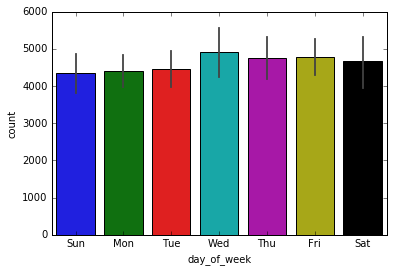

In [18]:
ax = sns.barplot(x= 'day_of_week',y = 'count',data = traindf)
ax.set_xticklabels('Sun-Mon-Tue-Wed-Thu-Fri-Sat'.split('-'))

[<matplotlib.text.Text at 0xeaf4a20>, <matplotlib.text.Text at 0xe517cf8>]

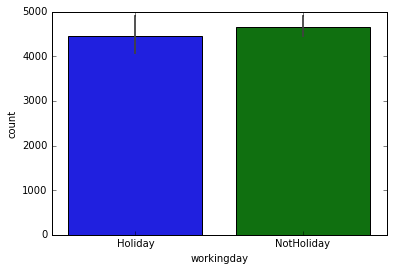

In [26]:
ax = sns.barplot(x= 'workingday',y = 'count',data = traindf)
ax.set_xticklabels('Holiday-NotHoliday'.split('-'))
#Not holyday is Having Higher

In [24]:
traindf.groupby('workingday').describe()['count']

workingday       
0.0         count     109.000000
            mean     4461.073394
            std      2144.505359
            min       605.000000
            25%      2732.000000
            50%      4660.000000
            75%      6041.000000
            max      8714.000000
1.0         count     222.000000
            mean     4665.896396
            std      1825.229911
            min       431.000000
            25%      3718.500000
            50%      4621.000000
            75%      5873.750000
            max      8167.000000
Name: count, dtype: float64

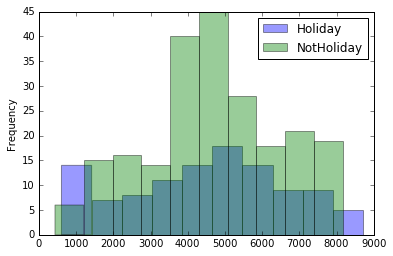

In [42]:
lables = 'Holiday-NotHoliday'.split('-')
for g, group in traindf.groupby('workingday'):
    ax = group['count'].plot(kind='hist',alpha=0.4,label = lables[int(g)])
ax.legend(loc='best')

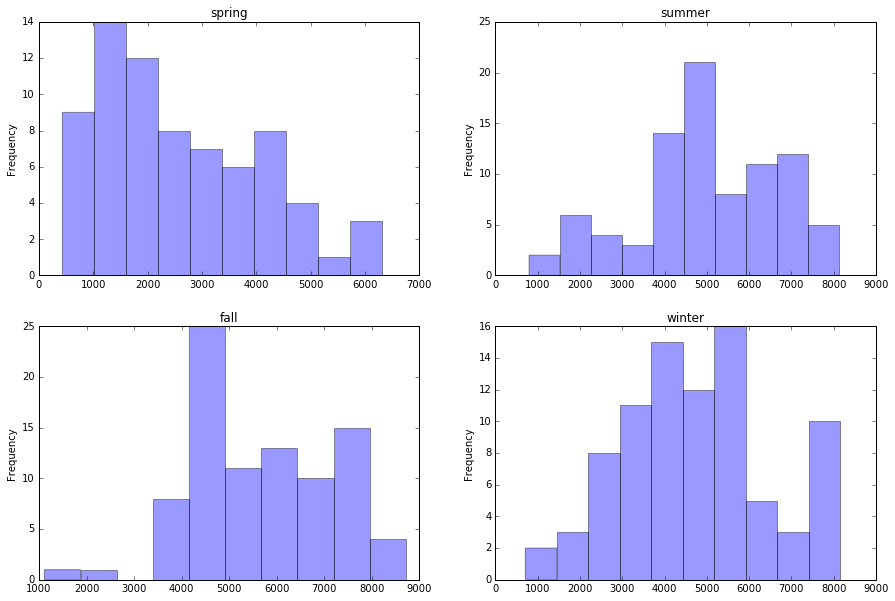

In [49]:
label = 'spring=summer=fall=winter'.split('=')
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.ravel()
for g, group in traindf.groupby('season'):
    i = int(g) - 1
    group['count'].plot(kind='hist',ax=ax[i],alpha=0.4)
    ax[i].set_title(label[i])
    #ax[int(g)] = group['count'].plot(kind='hist',alpha=0.4)#,#label = lables[int(g)])
#ax.legend(loc='best')

In [8]:
traindf['rain/snow'] = traindf['weather'].apply(lambda x: 1 if int(x) in [3,4] else 0)
testdf['rain/snow'] = testdf['weather'].apply(lambda x: 1 if int(x) in [3,4] else 0)

[<matplotlib.text.Text at 0x1091ed68>, <matplotlib.text.Text at 0x1094b198>]

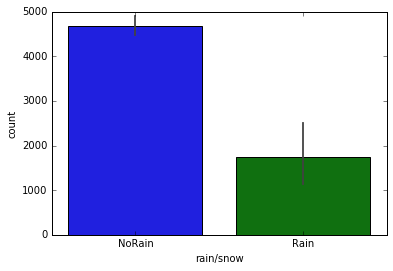

In [54]:
ax = sns.barplot(x= 'rain/snow',y = 'count',data = traindf)
ax.set_xticklabels('NoRain-Rain'.split('-'))

In [58]:
traindf.groupby('rain/snow')[['count']].describe()

count
rain/snow                   
0         count   321.000000
          mean   4687.613707
          std    1886.625924
          min     431.000000
          25%    3620.000000
          50%    4687.000000
          75%    6034.000000
          max    8714.000000
1         count    10.000000
          mean   1736.200000
          std    1179.971544
          min     506.000000
          25%     853.000000
          50%    1646.000000
          75%    1951.250000
          max    4459.000000

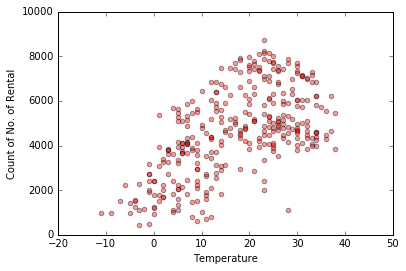

In [60]:
plt.ylabel('Count of No. of Rental')
plt.xlabel('Temperature')
plt.scatter(traindf['temp'].values, traindf['count'].values, alpha=0.4 , c='r')

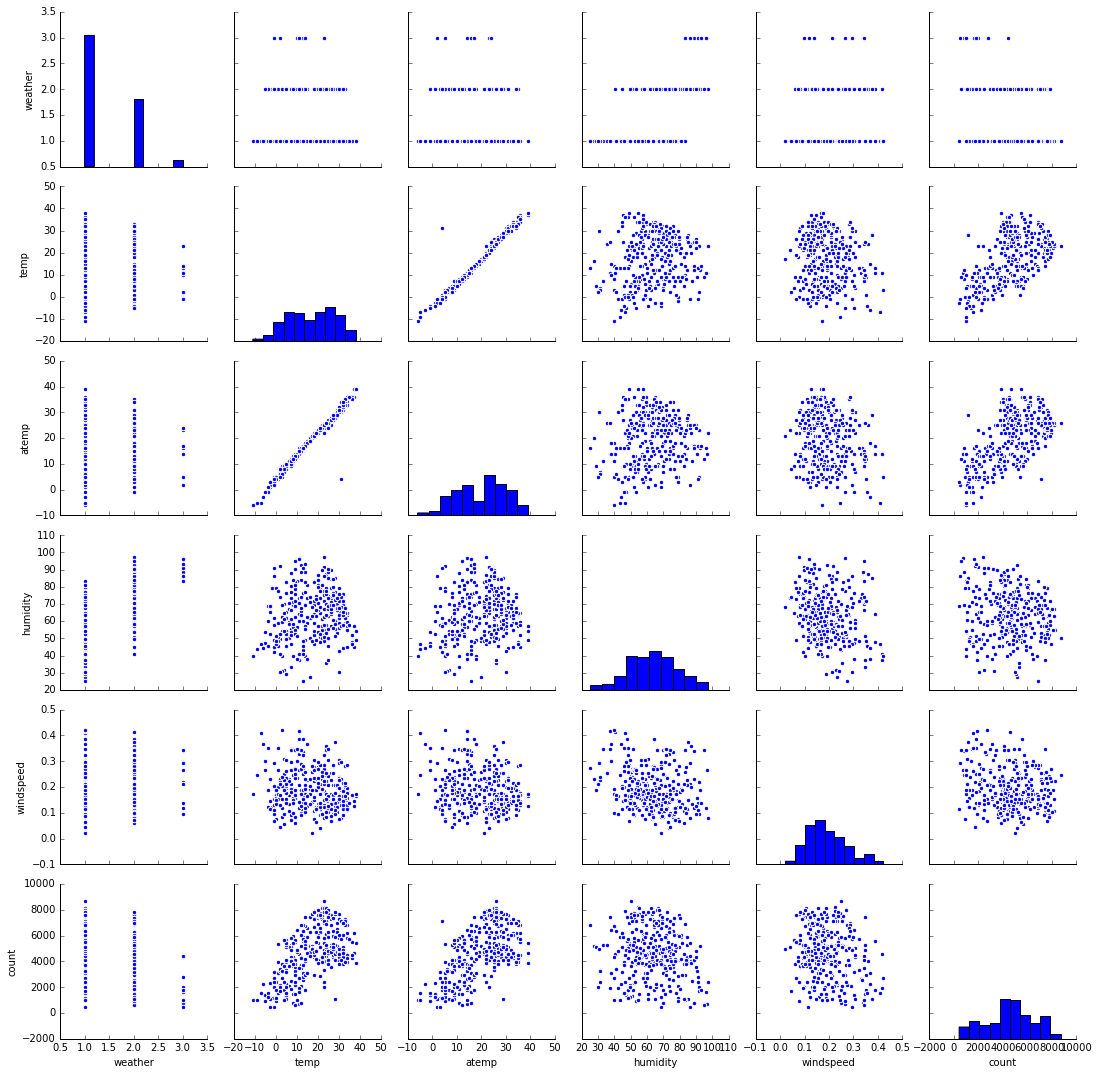

In [63]:
sns.pairplot(traindf[['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']])

1. How does the number of bike rentals vary between weekdays and weekends?  
     1a. The distributions seem comparable. There is a smaller number of samples from the weekends and thus outliers carry more          weight in the distribution.
2. How about bike rentals on holidays?  
     2a.Lower numbers on holidays. More rentals on not-holidays  
3. What effect does the season have on the bike rentals on a given day?  
     3a.Fall is high frequency of high number of rentals spring is lower no of rentals. 
4. Is the number of bike rentals lower than average when there is rain or snow?  
     4a. yes
5. How does temperature effect bike rentals?   
    5a. a positive correlation between temp and number of rentals
    
6. Do any of the numeric attributes have a clear non-linear dependence with number of the bike rentals?  
    6a. Temp,Humidity and count appear to have some sort of dependence.

We next require you to pre-process the categorical and numerical attributes in the data set:

- Notice that this data set contains categorical attributes with two or more categories. **Why can't they be directly used as predictors?** Convert these categorical attributes into multiple binary attributes using one-hot encoding: in the place of every categorical attribute $x_j$ that has categories $1, \ldots, K_j$, introduce $K_j-1$ binary predictors $x_{j1}, \ldots, x_{j,K_j-1}$ where $x_{jk}$ is 1 whenever $x_j = k$ and 0 otherwise. 
** Why is it okay to not have a binary column for the $K_j$-th category? **

- Since the attributes are in different scales, it is a good practice to standardize the continuous predictors, i.e. to scale each continuous predictor to have zero mean and a standard deviation of 1. This can be done by applying the following transform to each continuous-valued predictor $j$:
$\hat{x}_{ij} = (x_{ij} - \bar{x}_j) / s_j$, where $\bar{x}_j$ and $s_j$ are the sample mean and sample standard deviation (SD) of predictor $j$ in the training set. We emphasize that the mean and SD values used for standardization must be estimated using only the training set observations, while the transform is applied to both the training and test sets. 
** Why shouldn't we include the test set observations in computing the mean and SD? **

- Provide a table of the summary statistics of the new attributes (`pd.describe()' function will help).

*Hint:* You may use the `pd.get_dummies` function to convert a categorical attribute in a data frame to one-hot encoding. This function creates $K$ binary columns for an attribute with $K$ categories. We suggest that you delete the last (or first) binary column generated by this function.

**Note:** We shall use the term "attribute" to refer to a categorical column in the data set, and the term "predictor" to refer to the individual binary columns resulting out of one-hot encoding.

In [9]:
# your code here
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 12 columns):
season         331 non-null float64
month          331 non-null float64
holiday        331 non-null float64
day_of_week    331 non-null float64
workingday     331 non-null float64
weather        331 non-null float64
temp           331 non-null float64
atemp          331 non-null float64
humidity       331 non-null float64
windspeed      331 non-null float64
count          331 non-null float64
rain/snow      331 non-null int64
dtypes: float64(11), int64(1)
memory usage: 31.1 KB


In [10]:
traindf.columns

Index([u'season', u'month', u'holiday', u'day_of_week', u'workingday',
       u'weather', u'temp', u'atemp', u'humidity', u'windspeed', u'count',
       u'rain/snow'],
      dtype='object')

In [11]:
category_columns = ['season','month','day_of_week','weather']
non_category_columns = ['holiday','workingday','temp','atemp','humidity','windspeed','count']

In [12]:
traindf = pd.get_dummies(traindf, columns=category_columns, drop_first=True)
testdf = pd.get_dummies(testdf, columns=category_columns, drop_first=True)

In [13]:
traindf = traindf.drop('rain/snow',axis = 1)
testdf = testdf.drop('rain/snow',axis = 1)
traindf.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2.0,season_3.0,season_4.0,...,month_11.0,month_12.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,weather_2.0,weather_3.0
0,0.0,1.0,24.0,26.0,76.5833,0.118167,6073.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,15.0,19.0,73.3750,0.174129,6606.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,26.0,28.0,56.9583,0.253733,7363.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,4.0,58.6250,0.169779,2431.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,23.0,23.0,91.7083,0.097021,1996.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']

In [15]:
mean_traindf = traindf[numerical_columns].mean()
std_traindf = traindf[numerical_columns].std()
mean_traindf

temp         17.018127
atemp        19.543807
humidity     63.385776
windspeed     0.190833
dtype: float64

In [16]:
traindf[numerical_columns] = (traindf[numerical_columns] - mean_traindf)/std_traindf
testdf[numerical_columns] = (testdf[numerical_columns] - mean_traindf)/std_traindf

In [17]:
traindf.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2.0,season_3.0,season_4.0,...,month_11.0,month_12.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,weather_2.0,weather_3.0
0,0.0,1.0,0.623798,0.650106,0.920664,-0.928758,6073.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,-0.180310,-0.054759,0.696852,-0.213502,6606.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.802489,0.851495,-0.448383,0.803926,7363.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-1.520492,-1.565182,-0.332113,-0.269099,2431.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.534453,0.348021,1.975789,-1.199027,1996.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Part (b): Multiple Linear Regression

We are now ready to fit a linear regression model and analyze its coefficients and residuals.

- Fit a multiple linear regression model to the training set, and report its $R^2$ score on the test set.
- *Statistical significance*: Using a t-test, find out which of estimated coefficients are statistically significant at a significance level of 5% (p-value<0.05). Based on the results of the test, answer the following questions:
    - Which among the predictors have a positive correlation with the number of bike rentals? 
    - Does the day of a week have a relationship with bike rentals? 
    - Does the month influence the bike rentals? 
    - What effect does a holiday have on  bike rentals? 
    - Is there a difference in the coefficients assigned to `temp` and `atemp`? Give an explanation for your observation.
- *Residual plot:* Make a plot of residuals of the fitted model ${e} = y - \hat{y}$ as a function of the predicted value $\hat{y}$. Note that this is different from the residual plot for simple linear regression. Draw a horizontal line denoting the zero residual value on the Y-axis. Does the plot reveal a non-linear relationship between the predictors and response? What does the plot convey about the variance of the error terms?


In [18]:
# your code here
X_train = sm.add_constant(traindf.drop('count', axis=1))
X_test = sm.add_constant(testdf.drop('count', axis=1))
y_train = traindf['count'].values.reshape(-1,1)
y_test = testdf['count'].values.reshape(-1,1)
model_reg = OLS(y_train,X_train).fit()
y_train_pred = model_reg.predict(X_train)
y_test_pred = model_reg.predict(X_test)
print 'train r2 = ', r2_score(traindf['count'], y_train_pred)
print 'test r2 = ', r2_score(testdf['count'], y_test_pred)

train r2 =  0.576128178313
test r2 =  0.249342111465


In [19]:
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     15.25
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           6.56e-42
Time:                        17:32:54   Log-Likelihood:                -2832.1
No. Observations:                 331   AIC:                             5720.
Df Residuals:                     303   BIC:                             5827.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const            3681.7765    433.655      8.490      0.000      2828.419  4535.134
holiday          -284.3563    398.982     -0.713      0.477     -1069.483   500.770
workingday        308.1531    165.413      1.863      0.063       -17.351   633.657
temp              925.7338    474.536      1.951      0.052        -8.070  1859.538
atemp             312.4341    429.987      0.727      0.468      -533.705  1158.573
humidity         -548.4929    113.200     -4.845      0.000      -771.251  -325.735
windspeed        -255.1226     80.766     -3.159      0.002      -414.057   -96.189
season_2.0        898.8290    487.802      1.843      0.066       -61.079  1858.737
season_3.0       1032.8816    567.827      1.819      0.070       -84.503  2150.266
season_4.0       1226.1865    506.763      2.420      0.016       228.966  2223.407
month_2.0          88.9401    397.048      0.224      0.823      -692.381   870.262
month_3.0         239.1809    446.873      0.535      0.593      -640.188  1118.549
month_4.0         333.3491    675.444      0.494      0.622      -995.806  1662.504
month_5.0         -65.8125    726.311     -0.091      0.928     -1495.065  1363.440
month_6.0        -792.2629    749.803     -1.057      0.292     -2267.744   683.218
month_7.0       -1279.9870    816.047     -1.569      0.118     -2885.824   325.850
month_8.0        -776.4755    794.782     -0.977      0.329     -2340.467   787.516
month_9.0         405.1446    694.714      0.583      0.560      -961.931  1772.220
month_10.0        486.2509    651.713      0.746      0.456      -796.206  1768.708
month_11.0        112.6816    621.610      0.181      0.856     -1110.538  1335.902
month_12.0       -118.8358    505.353     -0.235      0.814     -1113.282   875.611
day_of_week_1.0  -123.7515    170.981     -0.724      0.470      -460.212   212.709
day_of_week_2.0  -195.2859    203.703     -0.959      0.338      -596.137   205.565
day_of_week_3.0   170.5113    213.789      0.798      0.426      -250.187   591.210
day_of_week_4.0    61.2560    206.213      0.297      0.767      -344.536   467.048
day_of_week_5.0   111.0669    198.877      0.558      0.577      -280.288   502.422
day_of_week_6.0   465.1450    269.154      1.728      0.085       -64.504   994.794
weather_2.0       -16.5666    210.139     -0.079      0.937      -430.083   396.949
weather_3.0     -1581.9783    529.223     -2.989      0.003     -2623.396  -540.560
==============================================================================
Omnibus:                       28.947   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.753
Skew:                           0.054   Prob(JB):                      0.00762
Kurtosis:                       2.166   Cond. No.                     2.22e+15


In [20]:
#for alpha 0.05
model_reg.pvalues<0.05

const               True
holiday            False
workingday         False
temp               False
atemp              False
humidity            True
windspeed           True
season_2.0         False
season_3.0         False
season_4.0          True
month_2.0          False
month_3.0          False
month_4.0          False
month_5.0          False
month_6.0          False
month_7.0          False
month_8.0          False
month_9.0          False
month_10.0         False
month_11.0         False
month_12.0         False
day_of_week_1.0    False
day_of_week_2.0    False
day_of_week_3.0    False
day_of_week_4.0    False
day_of_week_5.0    False
day_of_week_6.0    False
weather_2.0        False
weather_3.0         True
dtype: bool

In [21]:
model_reg.params == 0

const              False
holiday            False
workingday         False
temp               False
atemp              False
humidity           False
windspeed          False
season_2.0         False
season_3.0         False
season_4.0         False
month_2.0          False
month_3.0          False
month_4.0          False
month_5.0          False
month_6.0          False
month_7.0          False
month_8.0          False
month_9.0          False
month_10.0         False
month_11.0         False
month_12.0         False
day_of_week_1.0    False
day_of_week_2.0    False
day_of_week_3.0    False
day_of_week_4.0    False
day_of_week_5.0    False
day_of_week_6.0    False
weather_2.0        False
weather_3.0        False
dtype: bool

Which among the predictors have a positive correlation with the number of bike rentals?

In [22]:
#good Correlation
model_reg.pvalues[model_reg.pvalues<0.05]

const          9.368885e-16
humidity       2.020827e-06
windspeed      1.744235e-03
season_4.0     1.612408e-02
weather_3.0    3.025734e-03
dtype: float64

In [23]:
#positive Corr
model_reg.pvalues[(model_reg.pvalues<0.05) & (model_reg.params > 0) ]

const         9.368885e-16
season_4.0    1.612408e-02
dtype: float64

In [24]:
#-ve corr
model_reg.pvalues[(model_reg.pvalues<0.05) & (model_reg.params < 0) ]

humidity       0.000002
windspeed      0.001744
weather_3.0    0.003026
dtype: float64

Does the day of a week have a relationship with bike rentals?  
No

Does the month influence the bike rentals?  
No evidence for this

What effect does a holiday have on bike rentals?  
No evidence for this

Is there a difference in the coefficients assigned to temp and atemp? Give an explanation for your observation.  
No. temp and atemp are highly colinear and thus model results are misleading.

## Part (c): Checking Collinearity

Does the data suffer from multi-collinearity? To answer this question, let us first analyze the correlation matrix for the data. Compute the (Pearson product-moment) correlation matrix for the predictor variables in the training set, and visualize the matrix using a heatmap. For categorical attributes, you should use each binary predictor resulting from one-hot encoding to compute their correlations.  Are there predictors that fall into natural groups based on the correlation values? 

*Hint:* You may use the `np.corrcoef` function to compute the correlation matrix for a data set (do not forget to transpose the data matrix). You may use `plt.pcolor` function to visualize the correlation matrix.

<IPython.core.display.Javascript object>


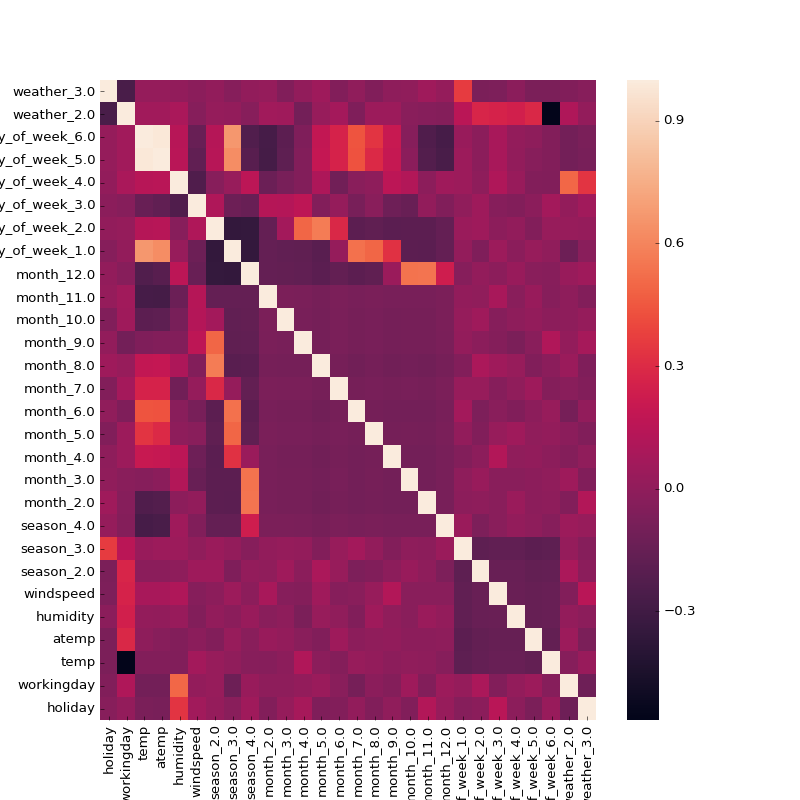

In [97]:
# your code he
interesting_columns = traindf.drop('count', axis=1).columns
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(np.corrcoef(traindf.drop('count', axis=1).T),ax=ax)
ax.set_xticklabels(interesting_columns, rotation='vertical')
ax.set_yticklabels(interesting_columns[::-1], rotation='horizontal')
plt.show()

There so many collinear predictors for ex: (Workingday,temp)(month_12.0,season_2.0)(day_of_week_1.0,temp/atemp)(day_of_week_4.0,Weather_2.0) and so many

## Part (d): Subset Selection

Apply either one of the following subset selection methods discussed in class to choose a minimal subset of predictors that are related to the response variable:
- Step-wise forward selection
- Step-wise backward selection

We require you to implement both these methods *from scratch*. You may use the Bayesian Information Criterion (BIC) to choose the subset size in each method. Do these methods eliminate one or more of the redundant predictors (if any) identified in Part (c)? In each case, fit linear regression models using the identified subset of predictors to the training set. How do the test $R^2$ scores for the fitted models compare with the model fitted in Part (b) using all predictors?




In [27]:
# your code here
def forward_selection(df,output_col):
    y_train = df[output_col].values.reshape(-1,1)
    predictors = set(df.drop('count', axis=1).columns)
    selected_predictors = set()
    n = df.shape[0]
    best_bic = np.inf
    best_bics = []
    best_models = []
    X = np.ones(n).reshape(-1,1)
    X = np.concatenate([X, df[list(selected_predictors)].values], axis=1)
    while (True):
        possible_bic_scores = []
        possible_predictors = list(selected_predictors ^ predictors)
        if len(possible_predictors) == 0:
            break    
        for predictor in possible_predictors: 
            x_temp = np.concatenate([X, df[predictor].values.reshape(-1,1)], axis=1)
            model = OLS(y_train,x_temp).fit()
            bic = model.bic
            possible_bic_scores.append(bic)      
        best_predictor_ix = np.argmin(possible_bic_scores)
        best_predictor = possible_predictors[best_predictor_ix]   
        best_bic = np.min(possible_bic_scores)
        best_bics.append(best_bic)
        selected_predictors.add(best_predictor)            
        X = np.concatenate([X, df[best_predictor].values.reshape(-1,1)], axis=1)
        best_models.append(list(selected_predictors))
    index_of_best_bic = np.argmin(best_bics)
    return best_models[index_of_best_bic]
    

In [34]:
forward_pred = forward_selection(traindf,'count')
forward_pred

['season_4.0',
 'windspeed',
 'humidity',
 'atemp',
 'month_9.0',
 'weather_3.0',
 'season_2.0']

In [35]:
def backward_selection(df,output_col):
    y_train = df[output_col].values.reshape(-1,1)
    predictors = set(df.drop('count', axis=1).columns)
    selected_predictors = set(predictors)
    n = df.shape[0]
    best_bic = np.inf 
    best_bics = []
    best_models = []
    while True:
        possible_bic_scores = []
        possible_predictors = list(selected_predictors)
        if len(possible_predictors) == 0:
            break
        for predictor in possible_predictors:
            X = np.concatenate([np.ones(n).reshape(-1,1), df[list(selected_predictors - set([predictor]))].values], axis=1)
            model = OLS(y_train,X).fit()
            bic = model.bic
            possible_bic_scores.append(bic)
        best_predictor_ix = np.argmin(possible_bic_scores)
        best_predictor = possible_predictors[best_predictor_ix] 
        best_bic = possible_bic_scores[best_predictor_ix]
        selected_predictors.discard(best_predictor) 
        best_bics.append(best_bic)
        best_models.append(list(selected_predictors))
    index_of_best_bic = np.argmin(best_bics)
    return best_models[index_of_best_bic]

In [36]:
backward_pred = backward_selection(traindf,'count')
backward_pred

['humidity',
 'windspeed',
 'season_3.0',
 'month_7.0',
 'season_4.0',
 'weather_3.0',
 'month_8.0',
 'temp',
 'month_6.0',
 'season_2.0']

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
reg_lin = LinearRegression()#.
rfe = RFE(estimator=reg_lin, n_features_to_select=5, step=1)
rfe.fit(traindf.drop('count',axis =1),traindf['count'])

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=5, step=1, verbose=0)

In [54]:
traindf.drop('count',axis =1).columns

Index([u'holiday', u'workingday', u'temp', u'atemp', u'humidity', u'windspeed',
       u'season_2.0', u'season_3.0', u'season_4.0', u'month_2.0', u'month_3.0',
       u'month_4.0', u'month_5.0', u'month_6.0', u'month_7.0', u'month_8.0',
       u'month_9.0', u'month_10.0', u'month_11.0', u'month_12.0',
       u'day_of_week_1.0', u'day_of_week_2.0', u'day_of_week_3.0',
       u'day_of_week_4.0', u'day_of_week_5.0', u'day_of_week_6.0',
       u'weather_2.0', u'weather_3.0'],
      dtype='object')

In [53]:
rfe.ranking_

array([ 2,  1,  8, 13, 12, 18,  6,  5,  7, 21, 19, 17, 23, 11,  9, 10, 16,
       15, 20, 22,  1,  1,  1,  3,  4, 14, 24,  1])

In [55]:
zip(rfe.ranking_,traindf.drop('count',axis =1).columns)

[(2, 'holiday'),
 (1, 'workingday'),
 (8, 'temp'),
 (13, 'atemp'),
 (12, 'humidity'),
 (18, 'windspeed'),
 (6, 'season_2.0'),
 (5, 'season_3.0'),
 (7, 'season_4.0'),
 (21, 'month_2.0'),
 (19, 'month_3.0'),
 (17, 'month_4.0'),
 (23, 'month_5.0'),
 (11, 'month_6.0'),
 (9, 'month_7.0'),
 (10, 'month_8.0'),
 (16, 'month_9.0'),
 (15, 'month_10.0'),
 (20, 'month_11.0'),
 (22, 'month_12.0'),
 (1, 'day_of_week_1.0'),
 (1, 'day_of_week_2.0'),
 (1, 'day_of_week_3.0'),
 (3, 'day_of_week_4.0'),
 (4, 'day_of_week_5.0'),
 (14, 'day_of_week_6.0'),
 (24, 'weather_2.0'),
 (1, 'weather_3.0')]

In [59]:
X_train_forward = sm.add_constant(traindf[forward_pred])
X_test_forward = sm.add_constant(testdf[forward_pred])
y_train = traindf['count'].values.reshape(-1,1)
model = OLS(y_train, X_train_forward)
result = model.fit()
y_pred_train = result.predict()
y_pred_test = result.predict(X_test_forward)
print'train r2 = ', r2_score(traindf['count'], y_pred_train)
print 'test r2 = ', r2_score(testdf['count'], y_pred_test)

train r2 =  0.532513398328
test r2 =  0.27579228429


In [60]:
X_train_backward = sm.add_constant(traindf[backward_pred])
X_test_backward = sm.add_constant(testdf[backward_pred])
model = OLS(y_train, X_train_backward)
result = model.fit()
y_pred_train = result.predict()
y_pred_test = result.predict(X_test_backward)
print'train r2 = ', r2_score(traindf['count'], y_pred_train)
print 'test r2 = ', r2_score(testdf['count'], y_pred_test)

train r2 =  0.556442132115
test r2 =  0.270481135658


your answers here

## Part (e): Cross Validation

- Perform a 10-fold cross-validation procedure to select between the 3 competing models you have so far: the model with the best BIC from Step-wise forward selection, the model with the best BIC from Step-wise backward selection (if it is different), and the model with all possible predictors.  Report the average $R^2$ across all 10 validation sets for each model and compare the results.  Why do you think this is the case?
- Evaluate each of the 3 models on the provided left out test set by calculating $R^2$.  Do the results agree with the cross-validation?  Why or why not?

In [63]:
# your code here
from sklearn.cross_validation import KFold
n = traindf.shape[0]
scores = []
for f_train, f_test in KFold(n, n_folds=10, shuffle=False, random_state=11):
    mini_train = traindf.iloc[f_train]
    mini_test = traindf.iloc[f_test]
    score = []
    for model in [traindf.drop('count', axis=1).columns, list(backward_pred), list(forward_pred)]:    
        X_train = sm.add_constant(mini_train[model])
        X_test = sm.add_constant(mini_test[model], has_constant='add') #small number of training example   
        y_train = mini_train['count'].values.reshape(-1,1)
        y_test = mini_test['count'].values.reshape(-1,1)
        model = OLS(y_train,X_train)
        result = model.fit()
        y_pred_train = result.predict()
        y_pred_test = result.predict(X_test)      
        score.append(r2_score(y_test, y_pred_test))                   
    scores.append(score)   
scores = np.array(scores)
np.mean(scores, axis=0)

array([ 0.34257855,  0.46033274,  0.4402681 ])

your answers here